# Explorando las Superficies:

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("properatti.csv")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")

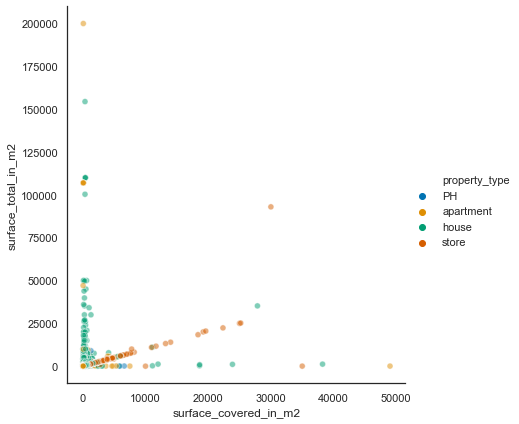

In [2]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

## Situacion de Nulls:

Voy a trabajar con las columnas que puedan aportar información referente a las superficies de las propiedades:

In [3]:
df[['surface_total_in_m2',\
    'surface_covered_in_m2',\
    'price_usd_per_m2', \
    'price_per_m2']].head()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,55.0,40.0,1127.272727,1550.000000
1,NaN,NaN,NaN,NaN
2,55.0,55.0,1309.090909,1309.090909
3,NaN,NaN,NaN,NaN
4,35.0,35.0,1828.571429,1828.571429


### Pirmero de forma individual:

In [4]:
#Cantidad de nulls en surface_total_in_m2
df.surface_total_in_m2.isnull().sum() 

39328

In [5]:
#Cantidad de nulls en surface_covered_in_m2
df.surface_covered_in_m2.isnull().sum()

19907

In [6]:
#Cantidad de nulls en price_usd_per_m2
df.price_usd_per_m2.isnull().sum()

52603

In [7]:
#Cantidad de nulls en price_per_m2
df.price_per_m2.isnull().sum()

33562

 ### Ahora de forma cruzada:

In [8]:
#Primero que nulls comparten las dos primeras columnas (surface_total_in_m2 y
#surface_covered_in_m2):

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull())].shape

(12369, 26)

In [9]:
#Voy a confirmar que la columna price_usd_per_m2 no aportaria 
#a la zona de nulls anterior:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull() & \
    df.price_usd_per_m2.notnull())].shape

(0, 26)

In [10]:
#Voy a confirmar que la columna price_per_m2 no aportaria 
#a la zona de nulls anterior:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull() & \
    df.price_per_m2.notnull())].shape

(0, 26)

In [11]:
#Ahora busco los nulos en la segunda columna surface_covered_in_m2 que pueden
#ser salvados por la primer columna surface_total_in_m2:

df[(df.surface_total_in_m2.notnull() & \
    df.surface_covered_in_m2.isnull())].shape

(7538, 26)

In [12]:
#Por ultimo busco los nulls en la primer columna surface_total_in_m2 que pueden 
#ser salvados por la segunda columna surface_covered_in_m2:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.notnull())].shape

(26959, 26)

## Mapa de nulls:

![title](map_null_sup.png)

Del análisis anterior obtenemos tres tipos de datos:

1 - Los Comunes

2 - Los Salvables

3 - Los perdidos

En el caso de los perdidos, no es el final del camino, aun se puede recuperar información de la columna de "Descripción" mediante expresiones regulares, dado lo limitado del tiempo y que otros compañeros de grupo actualmente se ocupan de esa tarea (REGEX), me voy a limitar de marcarlos y a seguir adelante.


## Outliers :

Antes de resolver la situación de los nulls, voy a tratar con los outliers de forma particular con cada columna, para luego poder obtener una relación limpia entre ambas columnas y poder salvar los nulls.
Primero voy a agrupar por el tipo de propiedad, y después voy a estudiar la distribución en cada caso, y finalmente usare un criterio de filtrado.

In [13]:
df = pd.read_csv("properatti.csv")

In [14]:
#Primero para surface_total_in_m2 :
df.groupby('property_type').describe()['surface_total_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3601.0,122.297417,298.387636,0.0,61.0,90.0,141.0,14742.0
apartment,51085.0,96.605873,1602.658969,0.0,43.0,59.0,87.0,200000.0
house,24505.0,507.438686,2135.548562,0.0,180.0,278.0,475.0,154438.0
store,2701.0,494.512403,2261.117146,0.0,60.0,154.0,360.0,93000.0


Se buscan valores de frontera que dejen fuera muchos datos, pero al mismo tiempo tengan algún sentido:

In [15]:
#De ser la frontera superior 2000m2 dejariamos afuera 633 casos:
df[df.surface_total_in_m2 > 2000].shape

(633, 26)

In [16]:
#En el caso de la frontera inferior deseche casos con menos de 25m2, dejando
#afuera 1003 casos:
df[df.surface_total_in_m2 < 25].shape

(1003, 26)

En el proximo cuadro, primero voy a generar las mascaras para filtrar los casos vistos arriba, voy a remplazar estos outliers por ceros primero, luego los volvere nulls, y finalmente mas adelante los dropeare:

In [17]:
mask1 = df[df.surface_total_in_m2 > 2000]['surface_total_in_m2']

df.loc[mask1.index, 'surface_total_in_m2'] = 0

mask2 = df[df.surface_total_in_m2 < 25]['surface_total_in_m2']

df.loc[mask2.index, 'surface_total_in_m2'] = 0

df.surface_total_in_m2.replace(0,np.nan, inplace=True)

In [18]:
#Por ultimo revisamos los nuevos valores:
df.groupby('property_type').describe()['surface_total_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3578.0,116.378703,87.830300,25.0,62.0,90.0,141.00,1200.0
apartment,50357.0,77.624481,66.935238,25.0,44.0,60.0,88.00,2000.0
house,23853.0,378.055800,314.129713,25.0,180.0,272.0,450.00,2000.0
store,2468.0,280.979741,334.761983,25.0,68.0,157.0,338.25,2000.0


In [19]:
#Ahora pasamos a la otra columnma surface_covered_in_m2 :
df.groupby('property_type').describe()['surface_covered_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4913.0,87.659475,138.843642,1.0,51.0,73.0,104.0,6610.0
apartment,59735.0,74.039173,805.139125,0.0,40.0,52.0,76.0,187000.0
house,33510.0,217.844942,420.279500,1.0,120.0,180.0,260.0,38240.0
store,3155.0,420.389223,1562.609045,1.0,42.0,120.0,300.0,35000.0


In [20]:
#Se usan criterios similares a los de arriba:
df[df.surface_covered_in_m2 > 2000].shape

(180, 26)

In [21]:
df[df.surface_covered_in_m2 < 25].shape

(2554, 26)

In [22]:
mask1 = df[df.surface_covered_in_m2 > 2000]['surface_covered_in_m2']

df.loc[mask1.index, 'surface_covered_in_m2'] = 0

mask2 = df[df.surface_covered_in_m2 < 25]['surface_covered_in_m2']

df.loc[mask2.index, 'surface_covered_in_m2'] = 0

df.surface_covered_in_m2.replace(0,np.nan, inplace=True)

In [23]:
df.groupby('property_type').describe()['surface_covered_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4630.0,89.232613,60.787772,25.0,55.0,75.0,107.0,1298.0
apartment,58726.0,67.715782,53.258454,25.0,40.0,53.0,77.0,2000.0
house,32591.0,214.113651,137.480994,25.0,122.0,184.0,260.0,2000.0
store,2632.0,256.953647,317.960279,25.0,60.0,140.0,307.0,2000.0


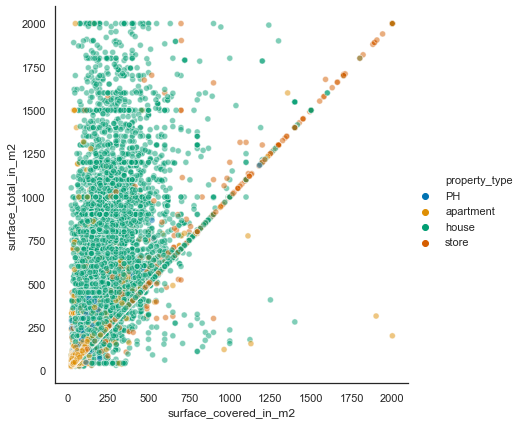

In [24]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### Relación surface_total_in_m2 / surface_total_in_m2 :

Ahora libres de Outliders vamos a estudiar que relacion existe entre estas dos columnas, teniendo en cuenta el tipo de propiedad:

In [25]:
#Sacamos un coeficiente con la media de cada tipo de propiedad:
rel_sup_PH = df.loc[df.property_type == 'PH']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'PH']['surface_covered_in_m2'].mean()
rel_sup_apartment = df.loc[df.property_type == 'apartment']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'apartment']['surface_covered_in_m2'].mean()
rel_sup_house = df.loc[df.property_type == 'house']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'house']['surface_covered_in_m2'].mean()
rel_sup_store = df.loc[df.property_type == 'store']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'store']['surface_covered_in_m2'].mean()

### Salvando Nulos:

Ahora con los coeficientes anteriores y filtrando a los nulos salvables en este primer caso, los nulos de surface_total_in_m2 que cuentan con un valor en surface_covered_in_m2, obtenemos un nuevo valor de surface_total_in_m2 :


In [26]:
mask1 = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask2 = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask3 = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask4 = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]

df.loc[mask1.index, 'surface_total_in_m2'] = rel_sup_PH * df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask2.index, 'surface_total_in_m2'] = rel_sup_apartment * df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask3.index, 'surface_total_in_m2'] = rel_sup_house * df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask4.index, 'surface_total_in_m2'] = rel_sup_store * df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]

En esta segunda etapa se hace el proceso inverso, y los nulos de surface_covered_in_m2 son tratados con los valores de surface_total_in_m2 y se hace uso inverso del coeficiente correspondiente, para obtener un nuevo valor de surface_covered_in_m2 :

In [27]:
mask1 = df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_PH
df.loc[mask2.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_apartment
df.loc[mask3.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_house
df.loc[mask4.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_store

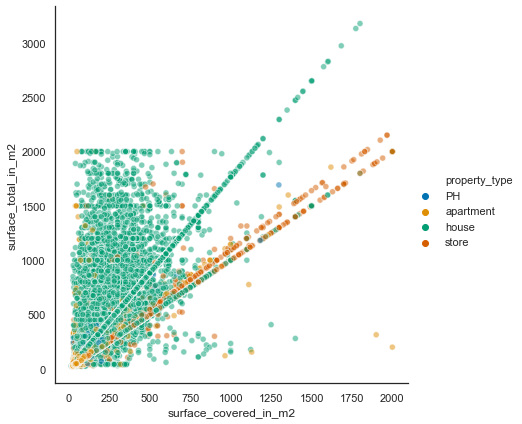

In [28]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### Que hacer con los nulos restantes:

Se me ocurren tres caminos para tratar los últimos nulos:

1- Buscar mediante expresiones regulares en la columna de descripción, y reiniciar el ciclo de outliers, dependerá del tiempo que nos quede.

2- Colocar el valor medio, teniendo en cuenta el tipo de propiedad.

3- Dropearlos, son 15229 casos, que representa el 12,5% del total de la base de datos.


### En caso de elegir la primer opción:

Se filtran y separan los nulos restantes para pasarle al equipo de expresiones regulares, con el fin de recuperar mas info de la columna "description" 

In [29]:
# nst = df.surface_total_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]
# nsc = df.surface_covered_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]

### En caso de elegir la segunda opción:

Como trabajamos anteriormente, primero armamos las mascaras teniendo en cuenta que ahora buscamos los nulos en surface_total_in_m2 y en surface_covered_in_m2, en esta primera etapa, completaremos la columna surface_total_in_m2, con los valores medios segun el tipo de propiedad:

In [30]:
mask1 = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'PH']['surface_total_in_m2'].mean()
df.loc[mask2.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'apartment']['surface_total_in_m2'].mean()
df.loc[mask3.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'house']['surface_total_in_m2'].mean()
df.loc[mask4.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'store']['surface_total_in_m2'].mean()

En esta segunda etapa tendremos dos cosas en cuenta, la primera, en la mascara ya no sera necesario filtrar con los nulls de surface_total_in_m2 pues esta columna ya no tiene desde el cuadro anterior, y la segunda, al valor medio que colocaremos le aplicaremos el coeficiente anteriormente calculado :

In [31]:
mask1 = df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'PH']['surface_covered_in_m2'].mean()/rel_sup_PH
df.loc[mask2.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'apartment']['surface_covered_in_m2'].mean()/rel_sup_apartment
df.loc[mask3.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'house']['surface_covered_in_m2'].mean()/rel_sup_house
df.loc[mask4.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'store']['surface_covered_in_m2'].mean()/rel_sup_store


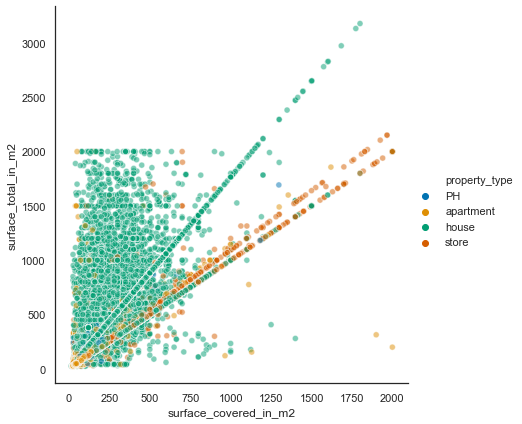

In [32]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### En caso de la tercer opción:

Se filtran y separan los nulos restantes para finalmente dropearlos.

In [33]:
# nst = df.surface_total_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]
# df.drop(nst.index, inplace=True)